# 1. Importing Necessary Tools

In [1]:
import pandas as pd      #dataset
from sklearn.feature_selection import SelectKBest
import numpy as np       #visualization tool
import seaborn as sbn    #visualization tool
from sklearn.metrics import classification_report,confusion_matrix    #for cofusion matrix and classfication report [Performace Matrices]  for MODEL IMPROVEMENT
import matplotlib.pyplot as plt    #To make the plots visible in the notebook we will add the below %matplotlib inline
%matplotlib inline

# 2. Importing Data

In [2]:
df = pd.read_csv('C:/Users/User/Documents/modified.csv') 
print (df)

          1/time     pressure      x-axis       y-axis     x-angle  \
0   16179.130300  26257.25407  627.061105  1086.187844  131.812288   
1    9177.967424  29274.87935  456.223075  1088.701627  156.107248   
2   17507.638430  22055.07532  661.249650  1061.830903  151.539064   
3   15398.702990  21016.42718  704.151973  1029.172084  173.918024   
4    6809.975119  27764.55380  665.853327  1041.202924  167.051164   
5   14834.303630  21284.86352  530.736026  1137.705796  141.299906   
6   16726.626340  25883.82493  688.877746  1055.345472  129.755634   
7   10326.980620  24481.44971  690.010918  1069.217794  147.990279   
8    9609.550090  29459.24453  802.135184  1074.980362  113.641220   
9    7771.565807  27950.77937  659.064670  1087.871351  143.499929   
10  11240.290300  23916.26575  615.058511  1140.124376   72.486629   
11  17434.796110  26454.77136  585.252807  1163.309574   59.007968   
12   8650.619723  23439.69885  582.888333  1110.676050   95.938934   
13   6736.374270  22

# 3.Exploratory Data Analysis

In [3]:
# Checking the datatype for all columns
df.dtypes

1/time      float64
pressure    float64
x-axis      float64
y-axis      float64
x-angle     float64
y-angle     float64
class         int64
dtype: object

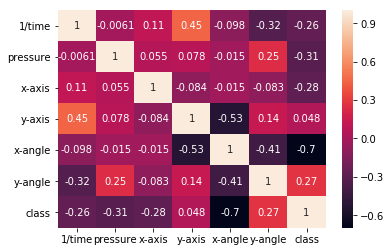

In [4]:
#Finding Correlation
sbn.heatmap(df[df.columns[0:10]].corr(),annot=True)

In [5]:
##DataFrame shape or Size of the data set (rows,columns)
df.shape

(23, 7)

# 4.Preprocessing

### Are there any missing values?

In [6]:
df.isnull().sum()  #So, there is no missing value

1/time      0
pressure    0
x-axis      0
y-axis      0
x-angle     0
y-angle     0
class       0
dtype: int64

### Specifying features and target variable
  Defining X and Y

In [7]:
X=df.iloc[:,0:6]    #coz target column chara amader 6 ta column ache.eder feature column bole. tai 0 theke 6 er ag porjonto X dhorbo.
Y=df["class"]    #etake ebhabeo likha zabe Y= df.iloc[ :,-1] karon amader target column ta ekdom last e ache.

# 5.Feature Selection
  Univariate Selection

In [8]:
#from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X= df.iloc[ :, 0:6]    #coz target column chara amader 6 ta column ache. tai 0 theke 6 er ag porjonto X dhorbo.
Y= df.iloc[ :,-1]    #etake ebhabeo likha zabe Y= df[ "class"] karon amader target column er name "class"

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y) 

In [9]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [10]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = [' Specs ',' Score ']

In [11]:
featureScores

,Specs,Score
0,1/time,2344.329229
1,pressure,728.499274
2,x-axis,22.875087
3,y-axis,0.150950
4,x-angle,95.281710
5,y-angle,13.119045


# 6.Data Cleaning
Outliers [ Using BoxPlot ]

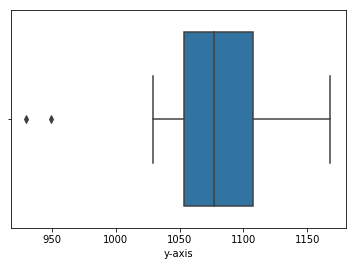

In [12]:
sbn.boxplot(df['y-axis']) #finding outlier in "y-axis" colum

In [13]:
Q1 = df["y-axis"].quantile(0.25)   # Q1 is the first quartile 
Q3 = df["y-axis"].quantile(0.75)   # Q3 is the third quartile
IQR = Q3 - Q1
print(IQR)

54.17355550000002


In [14]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

971.98432925
1188.67855125


In [15]:
df[((df["y-axis"] < Lower_Fence) |(df["y-axis"] > Upper_Fence))]

,1/time,pressure,x-axis,y-axis,x-angle,y-angle,class
15,8472.891495,26568.17093,527.845169,929.724226,152.123386,570.318578,1
16,5943.068202,23883.51310,645.812940,949.184535,108.861912,551.510106,1


In [16]:
df = df[~((df ["y-axis"] < Lower_Fence) |(df["y-axis"] > Upper_Fence))] 
df     # so ekhon jodi amra output dekhi tahole dekhbo 15 and 16 column bad gece

,1/time,pressure,x-axis,y-axis,x-angle,y-angle,class
0,16179.130300,26257.25407,627.061105,1086.187844,131.812288,529.835462,0
1,9177.967424,29274.87935,456.223075,1088.701627,156.107248,633.330804,0
2,17507.638430,22055.07532,661.249650,1061.830903,151.539064,593.555435,0
3,15398.702990,21016.42718,704.151973,1029.172084,173.918024,422.860358,0
4,6809.975119,27764.55380,665.853327,1041.202924,167.051164,504.542952,0
5,14834.303630,21284.86352,530.736026,1137.705796,141.299906,493.286183,0
6,16726.626340,25883.82493,688.877746,1055.345472,129.755634,597.789347,0
7,10326.980620,24481.44971,690.010918,1069.217794,147.990279,559.768570,0
8,9609.550090,29459.24453,802.135184,1074.980362,113.641220,684.494998,0
9,7771.565807,27950.77937,659.064670,1087.871351,143.499929,591.271418,0


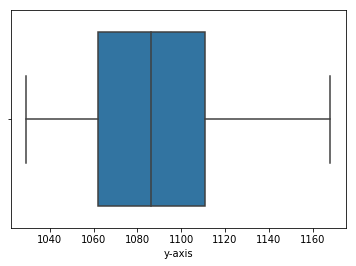

In [17]:
sbn.boxplot(df['y-axis']) #to varify the result, we print the column again

# 7.Resampling [Splitting Data]

### Test-Train Split

In [18]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)  #random state to make the split same  Test_size=25%

In [19]:
#len(X_train)

In [20]:
#len(X_test)

In [21]:
#X_train

In [22]:
#X_test

### Cross Validation
  Method: K Fold Cross Validation

In [23]:
#importing tools

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [24]:
#Selecting the number of folds

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=False, random_state=7)

In [25]:
#splitting the test train folds

for train_index, test_index in kf.split(X):    #X ta dilam. coz ei variable e feature colum ta define kora ache.
    print("TRAIN:", train_index, "TEST:", test_index) 

TRAIN: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] TEST: [0 1 2]
TRAIN: [ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] TEST: [3 4 5]
TRAIN: [ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22] TEST: [6 7 8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19 20 21 22] TEST: [ 9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 13 14 15 16 17 18 19 20 21 22] TEST: [11 12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 15 16 17 18 19 20 21 22] TEST: [13 14]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 19 20 21 22] TEST: [15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 21 22] TEST: [17 18]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 22] TEST: [19 20]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] TEST: [21 22]


In [26]:

#X_train, X_test = X[train_index], X[test_index]
    #Y_train, Y_test = Y[train_index], Y[test_index]



# 8.Model Evaluation Matrices

    A. Confusion Matrix
    B. Classification Report
    C. AUC ROC
    D. Accuracy

## Model-1: Support Vector Machine

In [27]:
# import
from sklearn.svm import SVC
# Create Support Vector Machine classfier
svc_model= SVC()
# Fit the classifier to the data
#svc_model.fit(X_train,Y_train)

#### Prediction for SVC   [If we use Test Train Split we need to add this step]

In [28]:
#Y_pred = svc_model.predict(X_test)   

In [29]:
#Y_pred

#### A. Confusion Matrix 

In [30]:
#results = confusion_matrix(Y_test, Y_pred) 

In [31]:
#sbn.heatmap(results,annot=True)

#### B. Classification Report

In [32]:
#print(classification_report(Y_test, Y_pred))

#### C. ROC Curve

In [33]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve

#fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
#plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.rcParams['font.size'] = 12
#plt.title('ROC curve for SVC classifier')
#plt.xlabel('False Positive Rate (1 - Specificity)')
#plt.ylabel('True Positive Rate (Sensitivity)')
#plt.grid(True)

In [34]:
# define a function that accepts a threshold and prints sensitivity and specificity
#def evaluate_threshold(threshold):
    #print('Sensitivity:', tpr[thresholds > threshold][-1])
    #print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [35]:
#evaluate_threshold(0.2)

In [36]:
#evaluate_threshold(0.8)

#### D. AUC

In [37]:
#print(metrics.roc_auc_score(y_test, y_pred_prob))

#### Accuracy [ If we use Test Train Split ]

In [38]:
#svc_model.score(X_test, Y_test)

#### Cross Validation Score

In [39]:
model=SVC()
results = cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 65.000% (45.000%)


## Model-2: Random Forest

In [40]:
# import
from sklearn.ensemble import RandomForestClassifier
# Create Random Forest classfier
rdclass=RandomForestClassifier()
# Fit the classifier to the data
#rdclass.fit(X_train,Y_train)

#### Prediction for Random Forest  [If we use Test Train Split we need to add this step]

In [41]:
#Y_pred = rdclass.predict(X_test)

In [42]:
#Y_pred

#### Confusion Matrix  

In [43]:
#results = confusion_matrix(Y_test, Y_pred)   #If we use Test Train Split

In [44]:
#sbn.heatmap(results,annot=True)  #If we use Test Train Split

#### Classification Report

In [45]:
#print(classification_report(Y_test, Y_pred))  #If we use Test Train Split

#### ROC Curve

In [46]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve

#### Accuracy 

In [47]:
#rdclass.score(X_test, Y_test)

#### Cross Validation Score

In [48]:
model=RandomForestClassifier()
results = cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 63.333% (25.604%)


## Model-3: K Nearest Neighbor

In [49]:
# import
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
#knn.fit(X_train,Y_train)

#### Prediction for KNN   [If we use Test Train Split we need to add this step]

In [50]:
#Y_pred = knn.predict(X_test)

In [51]:
#Y_pred

#### Confusion Matrix

In [52]:
#results = confusion_matrix(Y_test, Y_pred)  #If we use Test Train Split

In [53]:
#sbn.heatmap(results,annot=True) #If we use Test Train Split

#### Classification Report 

In [54]:
#print(classification_report(Y_test, Y_pred))  #If we use Test Train Split

#### ROC Curve

In [55]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve

#### Accuracy [ If we use Test Train Split ]

In [56]:
#knn.score(X_test, Y_test)

#### Cross Validation Score

In [57]:
model=KNeighborsClassifier( )
results = cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 63.333% (25.604%)


## Model-4: Logistic Regression

In [58]:
# import
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression classifier
logit = LogisticRegression(C=np.inf, solver='lbfgs')
# Fit the classifier to the data 
#logit.fit(X_train, Y_train)

#### Prediction for Logistic Regression

In [59]:
#Y_pred = logit.predict(X_test)

In [60]:
#Y_pred

#### Confusion Matrix  

In [61]:
#results = confusion_matrix(Y_test, Y_pred) 

In [62]:
#sbn.heatmap(results,annot=True)

#### Classification Report 

In [63]:
#print(classification_report(Y_test, Y_pred))

#### ROC Curve

In [64]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve

#### AUC

#### Accuracy

In [65]:
#logit.score(X_test, Y_test)

#### Cross Validation Score

In [66]:
model=LogisticRegression()
results = cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 71.667% (33.375%)


# Model-5: Naive Bayes

In [67]:
# import
from sklearn.naive_bayes import GaussianNB
# Create Support Vector Machine classfier
gnb_model = GaussianNB()

#### Confusion Matrix  

#### Classification Report 

#### ROC Curve

#### AUC

#### Cross Validation

In [68]:
model=GaussianNB()
results = cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 66.667% (38.730%)


# Model-6: Decision Tree

In [69]:
# import
from sklearn import tree
# Create Support Vector Machine classfier
dt_model = tree.DecisionTreeClassifier()

#### Confusion Matrix  

#### Classification Report 

#### ROC Curve

#### AUC

#### Cross Validation

In [70]:
model=tree.DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 61.667% (21.148%)
